In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

DATASET_PATH = "dataset"
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 20

# ✅ Data augmentation (sadece eğitim verisinde)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# ✅ Dropout'lu CNN modeli
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # 👈 Dropout eklendi
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Eğitim
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

# ✅ Son başarı
final_val_accuracy = history.history['val_accuracy'][-1]
final_train_accuracy = history.history['accuracy'][-1]
print(f"🎯 Eğitim Doğruluğu: %{final_train_accuracy*100:.2f}")
print(f"🎯 Doğrulama Doğruluğu: %{final_val_accuracy*100:.2f}")

# ✅ Modeli kaydet
model.save("yer_turu_modeli.keras")


Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 940ms/step - accuracy: 0.1991 - loss: 1.7078 - val_accuracy: 0.3850 - val_loss: 1.4662
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 852ms/step - accuracy: 0.3858 - loss: 1.4526 - val_accuracy: 0.3850 - val_loss: 1.2856
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 823ms/step - accuracy: 0.4542 - loss: 1.2493 - val_accuracy: 0.5050 - val_loss: 1.2419
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 801ms/step - accuracy: 0.4909 - loss: 1.2444 - val_accuracy: 0.5650 - val_loss: 1.0496
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 780ms/step - accuracy: 0.5129 - loss: 1.1466 - val_accuracy: 0.5900 - val_loss: 0.9906
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 774ms/step - accuracy: 0.5724 - loss: 1.0384 - val_accuracy: 0.5600 - val_loss: 0.9985
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 827ms/step - accuracy: 0.5232 - loss: 1.0871 - val_accuracy: 0.6400 - val_loss: 0.9477
Epoch 8/20
25/2

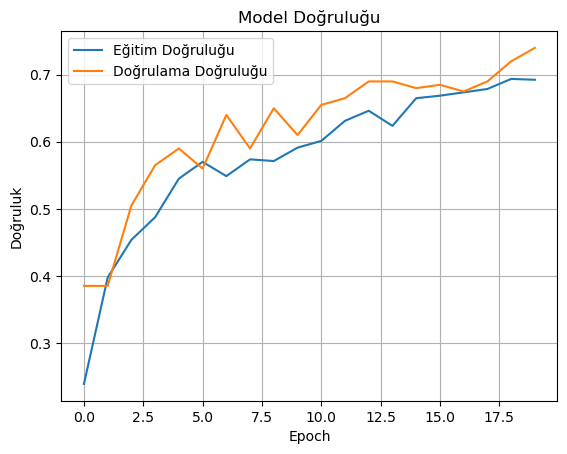

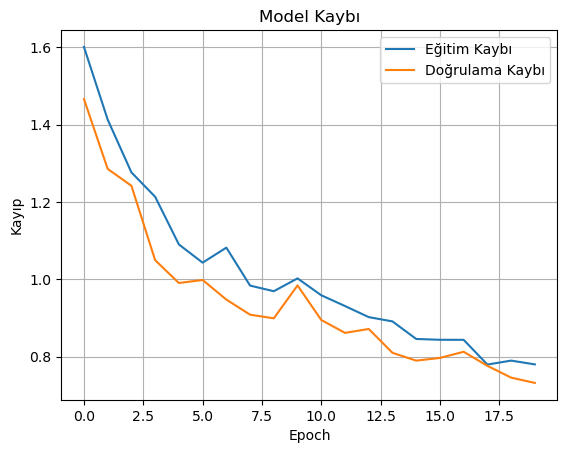

In [6]:
# Eğitim ve doğrulama doğruluğu grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model Doğruluğu')
plt.legend()
plt.grid()
plt.show()

# Eğitim ve doğrulama kaybı grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Model Kaybı')
plt.legend()
plt.grid()
plt.show()


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri klasörü
DATASET_PATH = "dataset"
IMAGE_SIZE = (224, 224)  # MobileNet için daha büyük
BATCH_SIZE = 32

# Veri ön işleme
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Transfer Learning - MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # ilk başta sadece son katmanlar eğitilecek

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 sınıf
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

# 🎯 Eğitim sonrası başarı
final_val_acc = history.history['val_accuracy'][-1]
final_train_acc = history.history['accuracy'][-1]
print(f"🎯 Eğitim Doğruluğu: %{final_train_acc*100:.2f}")
print(f"🎯 Doğrulama Doğruluğu: %{final_val_acc*100:.2f}")

# Modeli kaydet
model.save("mobilenet_yer_turu_modeli.keras")


Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


c:\Files\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6559 - loss: 0.8311 - val_accuracy: 0.9250 - val_loss: 0.1556
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 877ms/step - accuracy: 0.9401 - loss: 0.1876 - val_accuracy: 0.9600 - val_loss: 0.1186
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 878ms/step - accuracy: 0.9613 - loss: 0.1252 - val_accuracy: 0.9900 - val_loss: 0.0732
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 890ms/step - accuracy: 0.9758 - loss: 0.0715 - val_accuracy: 0.9900 - val_loss: 0.0677
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 874ms/step - accuracy: 0.9968 - loss: 0.0329 - val_accuracy: 0.9750 - val_loss: 0.0661
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.9900 - val_loss: 0.0466
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 881ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.9900 - val_loss: 0.0446
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 901ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accurac

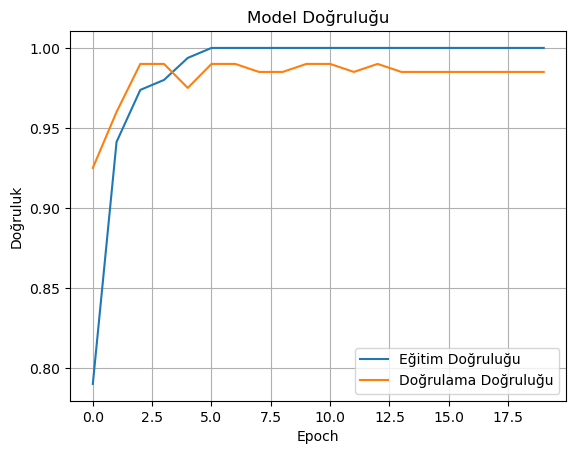

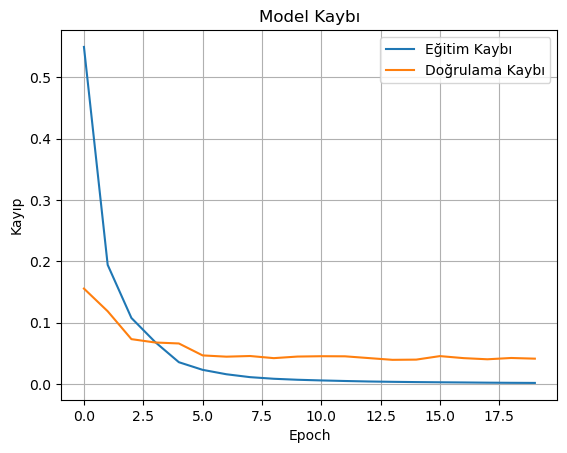

In [2]:
# Eğitim ve doğrulama doğruluğu grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model Doğruluğu')
plt.legend()
plt.grid()
plt.show()

# Eğitim ve doğrulama kaybı grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Model Kaybı')
plt.legend()
plt.grid()
plt.show()


In [3]:
import tensorflow as tf

# Eğittiğin modeli yükle
model = tf.keras.models.load_model("mobilenet_yer_turu_modeli.keras")

# Dönüştür
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Kaydet
with open("mobilenet_yer_turu_modeli.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\RABIAA~1\AppData\Local\Temp\tmprtvjyhe_\assets


INFO:tensorflow:Assets written to: C:\Users\RABIAA~1\AppData\Local\Temp\tmprtvjyhe_\assets


Saved artifact at 'C:\Users\RABIAA~1\AppData\Local\Temp\tmprtvjyhe_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2435579601424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579593168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579599504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579595664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579600080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579599696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579602768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579603152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579602960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2435579595856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2